<img src="Tut 2.1.png" width="900" />

In [1]:
from numpy import log, array, exp, linspace, asarray, argmax, interp, append
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#elementary
#irreversible
#liquid
#adiabatic
#equimolar feed at 27°C


In [3]:
R = 8.314 #kPa.m3/kmol.K
CpA = 15*4.187 #J/mol.K
CpB = CpA
CpC = 2*CpA
delHrx = -6000*4.187 #J/mol
K300 = 0.01 #L/mol.s at 300K
Ea = 10000*4.187 #J/mol
Ko = K300*exp(Ea/(8.314*300)) #L/mol/s
Q = 2 #L/s
CAo = 0.1 #mol/s
CBo = CAo
FAo = CAo*Q
FBo = CBo*Q
To = 27 + 273.15 #Kelvin

In [4]:

def aPFR(X1,V):
    X = X1[0]
    T = To - delHrx*X/(2*CpA)
    dXdV = (Ko/Q)*exp(-Ea/(R*T))*CAo*(1-X)**2
    return [dXdV]


In [5]:
Xo = [0]

Vspan = linspace(0,500,100)

Xi = odeint(aPFR,Xo,Vspan)

X = Xi[:,0]
T = To - delHrx*X/(2*CpA)


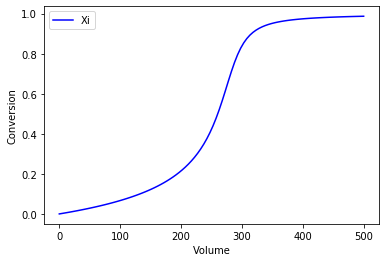

In [6]:
plt.figure(1)
plt.plot(Vspan, X, color='blue', label='Xi')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Volume') 
plt.show()

In [22]:
Conv85 = interp(-0.85,-X[::-1],Vspan[::-1])
print('PFR Volume required for 85% conversion= ',Conv85,'L')

PFR Volume required for 85% conversion=  302.21795898708683 L


In [8]:
X2=0.85
Tcstr = To - delHrx*X2/(2*CpA)
Vcstr = X2*Q*exp(Ea/(R*Tcstr))/(CAo*(1-X2)**2*Ko)
print('CSTR Volume required for 85% conversion= ',Vcstr,'L')

CSTR Volume required for 85% conversion=  173.70021403174118 L


In [9]:
# question b

In [10]:
Tb = 550 #K
Xb = 1 #reaction to completion
Tob = Tb + delHrx*Xb/(2*CpA)
print('Max inlet T to avoid bp exceeded=',Tob,'Kelvin')

Max inlet T to avoid bp exceeded= 350.0 Kelvin


In [11]:
# question c

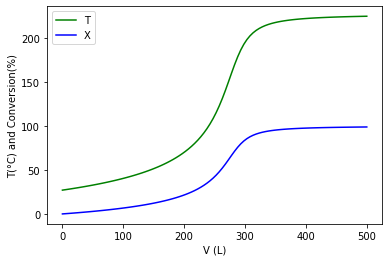

In [12]:
plt.figure(2)
plt.plot(Vspan, T-273.15, color = 'green', label = 'T')
plt.plot(Vspan, X*100, color = 'blue', label = 'X')
plt.xlabel('V (L)')
plt.ylabel('T(°C) and Conversion(%)')
plt.legend(loc='best')
#plt.grid()
plt.show()

In [13]:
# Question d

In [14]:
Vcstr = 500 #L
def CSTR500(var):
    X = var[0]
    Te = To - delHrx*X/(2*CpA)
    return[X - (Ko/Q)*exp(-Ea/(R*Te))*(CAo*(1-X)**2)*Vcstr]


In [15]:
from scipy.optimize import fsolve

In [16]:
Xcstr = fsolve(CSTR500,0.9)
Xf = Xcstr[-1]
print('Max conversion for 500CSTR=', Xf*100,'%')

Max conversion for 500CSTR= 92.13932367502295 %


In [17]:
Vcstr1 = 250 #L
def CSTR1(var1):
    X1 = var1[0]
    Te1 = To - delHrx*X1/(2*CpA)
    return[X1 - (Ko/Q)*exp(-Ea/(R*Te1))*(CAo*(1-X1)**2)*Vcstr1]
           
Xcstr1 = fsolve(CSTR1,0.9)
Xf1 = Xcstr1[-1]
Tf1 = To - delHrx*Xf1/(2*CpA)
print('Max conversion for 250CSTR=', Xf1*100,'%')
print('Tout of 250CSTR=', Tf1,'K')           

Max conversion for 250CSTR= 88.13477351900197 %
Tout of 250CSTR= 476.4195470380039 K


In [18]:
To1 = 350 #max feed temperature is 350K, therefore CSTR1 need be cooled before CSTR2
CAo1 = CAo*(1-Xf1)

In [19]:
Vcstr2 = 250 #L
def CSTR2(var2):
    X2 = var2[0]
    Te2 = To1 - delHrx*X2/(2*CpA)    
    return[X2 - (Ko/Q)*exp(-Ea/(R*Te2))*(CAo1*(1-X2)**2)*Vcstr2]
           
Xcstr2 = fsolve(CSTR2,0.9)
Xf2 = Xcstr2[-1]
Tf2 = To1 - delHrx*Xf2/(2*CpA)
print('Max conversion for 2nd 250CSTR=', Xf2*100,'%')
print('Tout of 250CSTR=', Tf2,'K') 

Max conversion for 2nd 250CSTR= 75.35183548379064 %
Tout of 250CSTR= 500.7036709675813 K


In [20]:
CAout = CAo1*(1-Xf2)
Tconv = -(CAout-CAo)/CAo
Tconv

0.9707543945674276